# Coursework 2 - Machine Learning - Question 3

Code realised by Robin Mathelier for the final coursework of Machine Learning module in MSc Statistics Imperial College London

In [1]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import pandas as pd

import random

import numpy as np

from math import *

import scipy.optimize

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, Matern, WhiteKernel, ExpSineSquared, RationalQuadratic
from sklearn.metrics import make_scorer


In [2]:
os.chdir(r"C:\Users\robin\Dropbox\Applications\Overleaf\Coursework 2 ML")
os.getcwd()

'C:\\Users\\robin\\Dropbox\\Applications\\Overleaf\\Coursework 2 ML'

## Import data

In [3]:
data_train = pd.read_csv("train_dataQ3.csv")
data_test = pd.read_csv("test_dataQ3.csv")

In [4]:
random.seed(1945214)

s = [random.randint(0, 2000) for i in range(200)]
data_train = data_train.iloc[s,:]

X_train = np.array(data_train["x"]).reshape(-1,1)
y_train = np.array(data_train["y"]).reshape(-1,1)

X_test = np.array(data_test["x"]).reshape(-1,1)
y_test = np.array(data_test["y"]).reshape(-1,1)

n = X_train.shape[0]
p = X_train.shape[1]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 1), (200, 1), (20, 1), (20, 1))

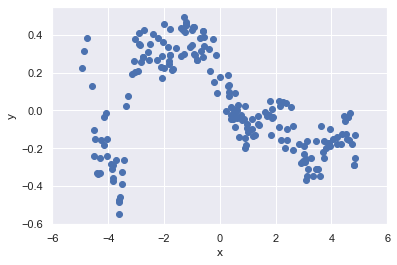

In [5]:
fig = plt.figure()
plt.scatter(X_train, y_train)
plt.xlim(-6,6)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.savefig('scatter.pdf', bbox_inches='tight')

## Kernel Ridge Regression

In [6]:
krr = KernelRidge(kernel = "poly", degree = 3)
krr.fit(X_train, y_train)
krr.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'poly',
 'kernel_params': None}

In [7]:
y_pred_train_krr = krr.predict(X_train)
y_pred_test_krr = krr.predict(X_test)

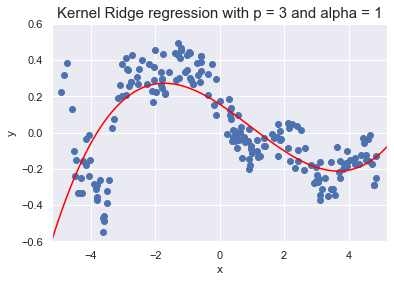

In [8]:
x = np.linspace(-6,6,100).reshape(-1,1)
y = krr.predict(x)
plt.scatter(X_train, y_train)
plt.plot(x,y,color='red')
plt.xlim(-5.2, 5.2)
plt.ylim(-0.6, 0.6)
plt.title("Kernel Ridge regression with p = 3 and alpha = 1", fontsize = 15)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.savefig('krr_3_1.pdf', bbox_inches='tight')

In [9]:
mean_squared_error(y_train, y_pred_train_krr).round(6), mean_squared_error(y_test, y_pred_test_krr).round(6)

(0.030839, 0.084984)

## Kernel Ridge Regression with parameters tuning (degree tuned)

In [10]:
grid_krr = {"alpha" : np.linspace(0.001, 10, num = 1000),
           "degree" : range(30)}

In [11]:
krr_ = KernelRidge(kernel = "poly")
grid_search = RandomizedSearchCV(estimator = krr_, 
                                 param_distributions = grid_krr, 
                                 n_iter = 10000, 
                                 cv = 5, 
                                 random_state=42, 
                                 n_jobs = -1,
                                scoring = "neg_mean_squared_error")
grid_search.fit(X_train, y_train)

c:\users\robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


RandomizedSearchCV(cv=5, estimator=KernelRidge(kernel='poly'), n_iter=10000,
                   n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-03, 1.10090090e-02, 2.10180180e-02, 3.10270270e-02,
       4.10360360e-02, 5.10450450e-02, 6.10540541e-02, 7.10630631e-02,
       8.10720721e-02, 9.10810811e-02, 1.01090090e-01, 1.11099099e-01,
       1.21108108e-01, 1.31117117e-01, 1.41126126e-01, 1.511...
       9.80982883e+00, 9.81983784e+00, 9.82984685e+00, 9.83985586e+00,
       9.84986486e+00, 9.85987387e+00, 9.86988288e+00, 9.87989189e+00,
       9.88990090e+00, 9.89990991e+00, 9.90991892e+00, 9.91992793e+00,
       9.92993694e+00, 9.93994595e+00, 9.94995495e+00, 9.95996396e+00,
       9.96997297e+00, 9.97998198e+00, 9.98999099e+00, 1.00000000e+01]),
                                        'degree': range(0, 30)},
                   random_state=42, scoring='neg_mean_squared_error')

In [12]:
grid_search.best_params_

{'degree': 11, 'alpha': 0.5314774774774775}

In [13]:
krr_final = grid_search.best_estimator_

In [14]:
y_pred_train_krr_final = krr_final.predict(X_train)
y_pred_test_krr_final = krr_final.predict(X_test)

mean_squared_error(y_train, y_pred_train_krr_final).round(7), mean_squared_error(y_test, y_pred_test_krr_final).round(4)

(0.0095686, 101.5477)

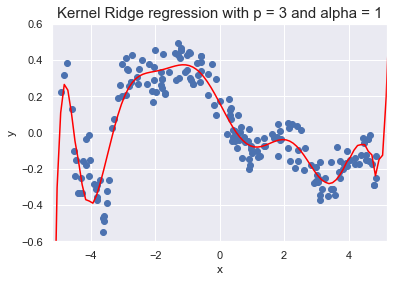

In [15]:
x = np.linspace(-5.5, 5.5, 100).reshape(-1,1)
y = krr_final.predict(x)
plt.scatter(X_train, y_train)
plt.plot(x,y,color='red')
plt.xlim(-5.2, 5.2)
plt.ylim(-0.6, 0.6)
plt.title("Kernel Ridge regression with p = 3 and alpha = 1", fontsize = 15)
plt.xlabel("x", fontsize = 12)
plt.ylabel("y", fontsize = 12)
plt.savefig('krr_3_1.pdf', bbox_inches='tight')

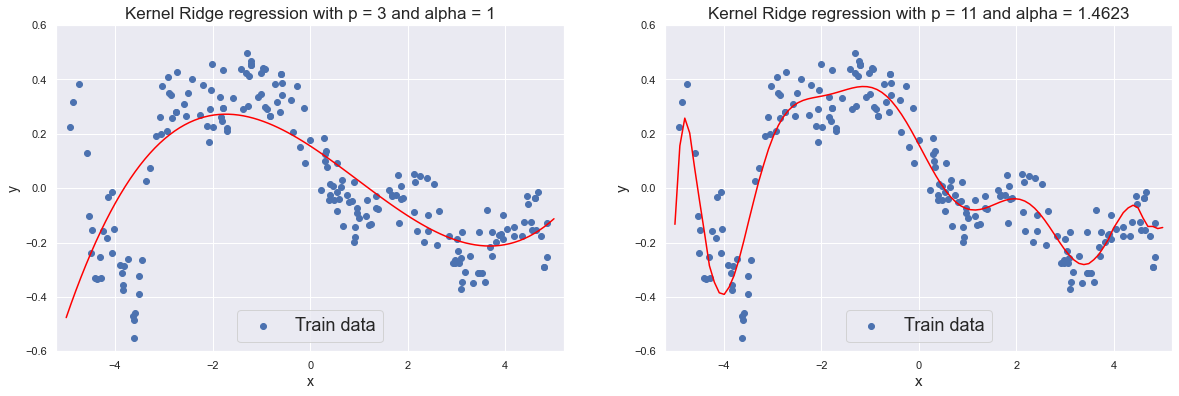

In [16]:
X_ = np.linspace(-6, 6, 100)
fig, axs = plt.subplots(1,2, figsize=(20, 6))

x = np.linspace(-5, 5, 100).reshape(-1,1)
y = krr.predict(x)
l = axs[0].scatter(X_train, y_train)
axs[0].plot(x,y,color='red')
axs[0].set_xlim(-5.2, 5.2)
axs[0].set_ylim(-0.6, 0.6)
axs[0].set_title("Kernel Ridge regression with p = 3 and alpha = 1", fontsize = 17)
axs[0].set_xlabel("x", fontsize = 14)
axs[0].set_ylabel("y", fontsize = 14)
axs[0].legend([l],["Train data"], loc = "lower center", prop={'size':18})

x = np.linspace(-5, 5, 100).reshape(-1,1)
y = krr_final.predict(x)
l1 = axs[1].scatter(X_train, y_train)
axs[1].plot(x,y,color='red')
axs[1].set_xlim(-5.2, 5.2)
axs[1].set_ylim(-0.6, 0.6)
axs[1].set_title("Kernel Ridge regression with p = 11 and alpha = 1.4623", fontsize = 17)
axs[1].set_xlabel("x", fontsize = 15)
axs[1].set_ylabel("y", fontsize = 15)
axs[1].legend([l],["Train data"], loc = "lower center", prop={'size':18})

plt.savefig('train_Ridge.pdf', bbox_inches='tight')

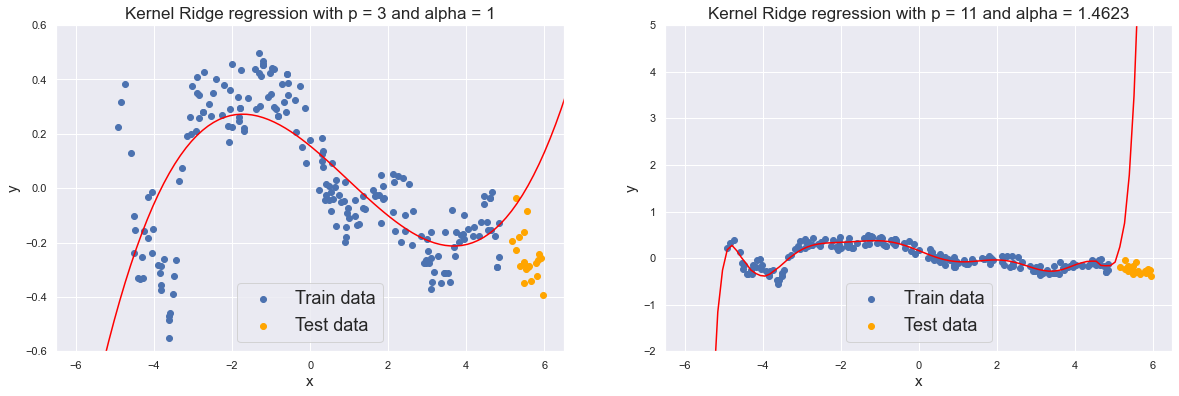

In [17]:
X_ = np.linspace(-6, 6, 100)
fig, axs = plt.subplots(1,2, figsize=(20, 6))

x = np.linspace(-7, 7, 100).reshape(-1,1)
y = krr.predict(x)
l1 = axs[0].scatter(X_train, y_train)
l2 = axs[0].scatter(X_test, y_test, color = 'orange')
axs[0].plot(x,y,color='red')
axs[0].set_xlim(-6.5, 6.5)
axs[0].set_ylim(-0.6, 0.6)
axs[0].set_title("Kernel Ridge regression with p = 3 and alpha = 1", fontsize = 17)
axs[0].set_xlabel("x", fontsize = 15)
axs[0].set_ylabel("y", fontsize = 15)
axs[0].legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':18})

x = np.linspace(-6, 6, 100).reshape(-1,1)
y = krr_final.predict(x)
l1 = axs[1].scatter(X_train, y_train)
l2 = axs[1].scatter(X_test, y_test, color = 'orange')
axs[1].plot(x,y,color='red')
axs[1].set_xlim(-6.5, 6.5)
axs[1].set_ylim(-2, 5)
axs[1].set_title("Kernel Ridge regression with p = 11 and alpha = 1.4623", fontsize = 17)
axs[1].set_xlabel("x", fontsize = 15)
axs[1].set_ylabel("y", fontsize = 15)
axs[1].legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':18})

plt.savefig('test_Ridge.pdf', bbox_inches='tight')

# Gaussian Process

In [18]:
gpc_rbf = GaussianProcessRegressor(kernel= 1 * RBF() + WhiteKernel(),
                                random_state=42, n_restarts_optimizer = 50).fit(X_train, y_train)

gpc_mat = GaussianProcessRegressor(kernel= 1 * Matern() +  WhiteKernel(),
                                random_state=42, n_restarts_optimizer = 50).fit(X_train, y_train)

gpc_quad = GaussianProcessRegressor(kernel = 1 * RationalQuadratic() + WhiteKernel(),
                                random_state=42, n_restarts_optimizer = 50).fit(X_train, y_train)

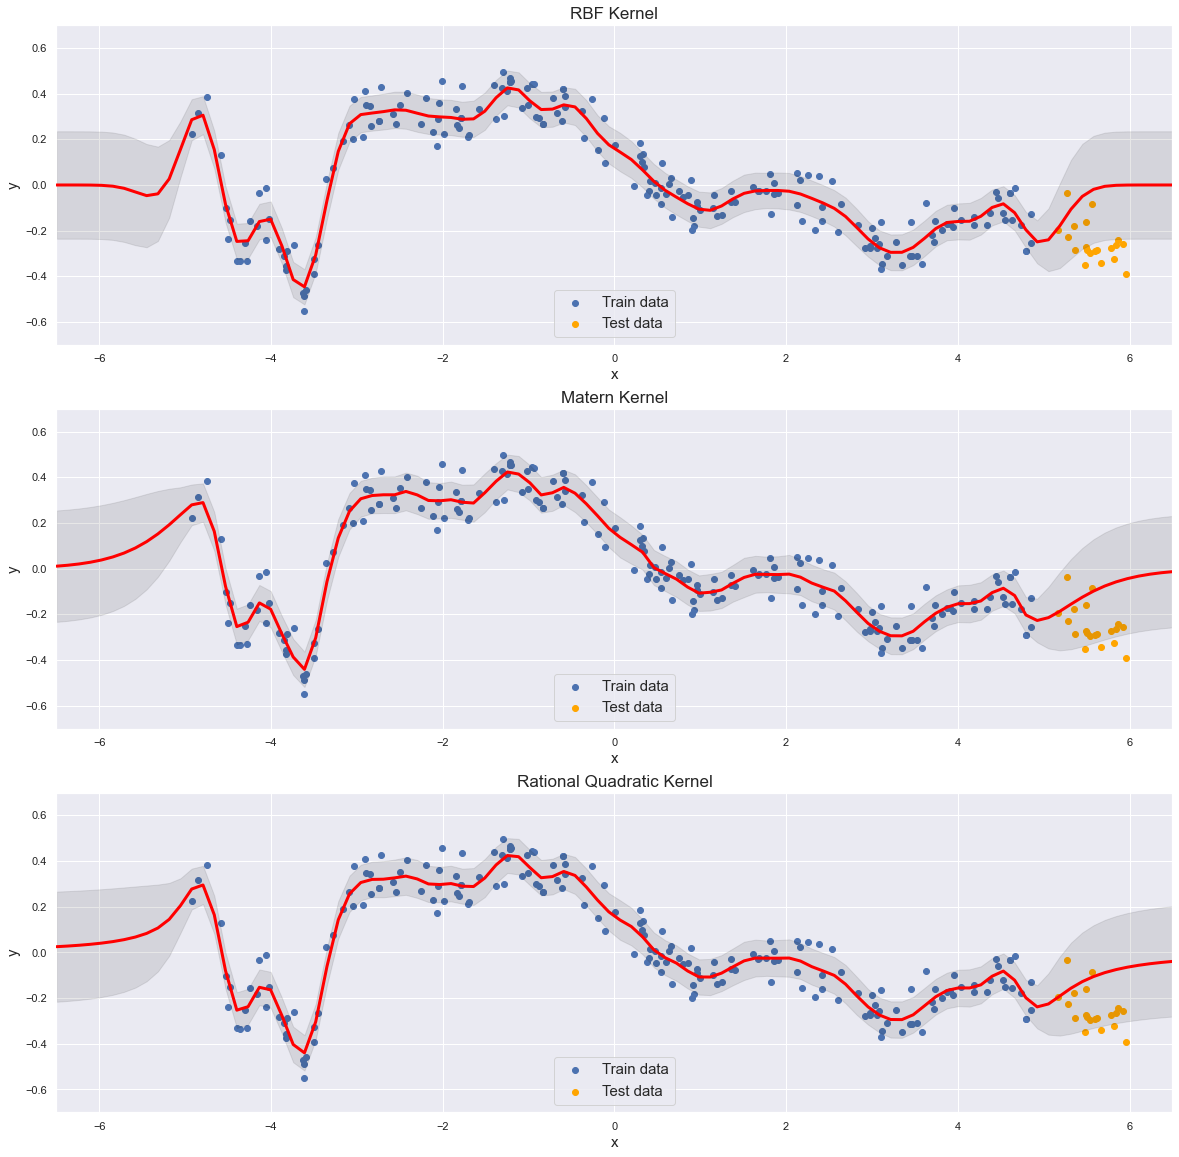

In [19]:
X_ = np.linspace(-6.5, 6.5, 100)
fig, axs = plt.subplots(3,1, figsize=(20, 20))

l1 = axs[0].scatter(X_train, y_train)
l2 = axs[0].scatter(X_test, y_test, color = 'orange')
y_mean_rbf, y_std_rbf = gpc_rbf.predict(X_[:, np.newaxis], return_std=True)
y_mean_rbf = y_mean_rbf.reshape(-1,)
axs[0].fill_between(X_, y_mean_rbf - y_std_rbf, y_mean_rbf + y_std_rbf,
                     alpha=0.1, color='k')
axs[0].plot(X_, y_mean_rbf, 'k', lw=3, zorder=9, color = 'red')
axs[0].set_xlabel("x", fontsize = 15)
axs[0].set_ylabel("y", fontsize = 15)
axs[0].set_title('RBF Kernel', fontsize = 17)
axs[0].set_xlim(-6.5,6.5)
axs[0].set_ylim(-0.7,0.7)
axs[0].legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':15})

l1 = axs[1].scatter(X_train, y_train)
l2 = axs[1].scatter(X_test, y_test, color = 'orange')
y_mean_mat, y_std_mat = gpc_mat.predict(X_[:, np.newaxis], return_std=True)
y_mean_mat = y_mean_mat.reshape(-1,)
axs[1].fill_between(X_, y_mean_mat - y_std_mat, y_mean_mat + y_std_mat,
                     alpha=0.1, color='k')
axs[1].plot(X_, y_mean_mat, 'k', lw=3, zorder=9, color = 'red')
axs[1].set_xlabel("x", fontsize = 15)
axs[1].set_ylabel("y", fontsize = 15)
axs[1].set_title('Matern Kernel', fontsize = 17)
axs[1].set_xlim(-6.5,6.5)
axs[1].set_ylim(-0.7,0.7)
axs[1].legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':15})

l1 = axs[2].scatter(X_train, y_train)
l2 = axs[2].scatter(X_test, y_test, color = 'orange')
y_mean_quad, y_std_quad = gpc_quad.predict(X_[:, np.newaxis], return_std=True)
y_mean_quad = y_mean_quad.reshape(-1,)
axs[2].fill_between(X_, y_mean_quad - y_std_quad, y_mean_quad + y_std_quad,
                     alpha=0.1, color='k')
axs[2].plot(X_, y_mean_quad, 'k', lw=3, zorder=9, color = 'red')
axs[2].set_xlabel("x", fontsize = 15)
axs[2].set_ylabel("y", fontsize = 15)
axs[2].set_title('Rational Quadratic Kernel', fontsize = 17)
axs[2].set_xlim(-6.5,6.5)
axs[2].set_ylim(-0.7,0.7)
axs[2].legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':15})


plt.savefig("Kernels_fitted.pdf", bbox_inches='tight')

In [20]:
y_pred_train_gfb = gpc_rbf.predict(X_train)
y_pred_test_gbf = gpc_rbf.predict(X_test)

mean_squared_error(y_train, y_pred_train_gfb).round(7), mean_squared_error(y_test, y_pred_test_gbf).round(7)

(0.0044143, 0.0578042)

In [21]:
y_pred_train_mat = gpc_mat.predict(X_train)
y_pred_test_mat = gpc_mat.predict(X_test)

mean_squared_error(y_train, y_pred_train_mat).round(7), mean_squared_error(y_test, y_pred_test_mat).round(7)

(0.0041595, 0.0341952)

In [22]:
y_pred_train_quad = gpc_quad.predict(X_train)
y_pred_test_quad = gpc_quad.predict(X_test)

mean_squared_error(y_train, y_pred_train_quad).round(7), mean_squared_error(y_test, y_pred_test_quad).round(7)

(0.0043083, 0.0307284)

In [23]:
gpc_rbf.kernel_.get_params()

{'k1': 0.224**2 * RBF(length_scale=0.312),
 'k2': WhiteKernel(noise_level=0.00524),
 'k1__k1': 0.224**2,
 'k1__k2': RBF(length_scale=0.312),
 'k1__k1__constant_value': 0.05003447336102375,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 0.3122970606125597,
 'k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k2__noise_level': 0.0052416774754267025,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

In [24]:
gpc_mat.kernel_.get_params()

{'k1': 0.233**2 * Matern(length_scale=0.595, nu=1.5),
 'k2': WhiteKernel(noise_level=0.00517),
 'k1__k1': 0.233**2,
 'k1__k2': Matern(length_scale=0.595, nu=1.5),
 'k1__k1__constant_value': 0.05446035651747976,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 0.5951682782787143,
 'k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k1__k2__nu': 1.5,
 'k2__noise_level': 0.005169265263054219,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

In [25]:
gpc_quad.kernel_.get_params()

{'k1': 0.234**2 * RationalQuadratic(alpha=0.702, length_scale=0.387),
 'k2': WhiteKernel(noise_level=0.00522),
 'k1__k1': 0.234**2,
 'k1__k2': RationalQuadratic(alpha=0.702, length_scale=0.387),
 'k1__k1__constant_value': 0.054531812834067196,
 'k1__k1__constant_value_bounds': (1e-05, 100000.0),
 'k1__k2__length_scale': 0.38654836704669554,
 'k1__k2__alpha': 0.7019479437737968,
 'k1__k2__length_scale_bounds': (1e-05, 100000.0),
 'k1__k2__alpha_bounds': (1e-05, 100000.0),
 'k2__noise_level': 0.005222045849188973,
 'k2__noise_level_bounds': (1e-05, 100000.0)}

# Gaussian Process - Model Selection

### Cross Validation

In [26]:
mse_cv = cross_val_score(gpc_rbf, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
-np.mean(mse_cv).round(7)

0.0069437

In [27]:
mse_cv = cross_val_score(gpc_mat, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
-np.mean(mse_cv).round(7)

0.0071174

In [28]:
mse_cv = cross_val_score(gpc_quad, X_train, y_train, cv=5, scoring = 'neg_mean_squared_error')
-np.mean(mse_cv).round(7)

c:\users\robin\appdata\local\programs\python\python37\lib\site-packages\sklearn\gaussian_process\_gpr.py:504: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


0.00699

### BIC - AIC

In [29]:
ndim_rbf = gpc_rbf.kernel_.n_dims
ndim_mat = gpc_mat.kernel_.n_dims
ndim_quad = gpc_quad.kernel_.n_dims

ndim_rbf, ndim_mat, ndim_quad

(3, 3, 4)

In [30]:
AIC_rbf = 2 * ndim_rbf - 2 * gpc_rbf.log_marginal_likelihood()
AIC_mat = 2 * ndim_mat - 2 * gpc_mat.log_marginal_likelihood()
AIC_quad = 2 * ndim_quad - 2 * gpc_quad.log_marginal_likelihood()

AIC_rbf.round(4), AIC_mat.round(4), AIC_quad.round(4)

(-364.6211, -365.7772, -365.4262)

In [31]:
BIC_rbf = log(n) * ndim_rbf - 2 * gpc_rbf.log_marginal_likelihood()
BIC_mat = log(n) * ndim_mat - 2 * gpc_mat.log_marginal_likelihood()
BIC_quad = log(n) * ndim_quad - 2 * gpc_quad.log_marginal_likelihood()

BIC_rbf.round(4), BIC_mat.round(4), BIC_quad.round(4)

(-354.7262, -355.8823, -352.233)

### Marginal likelihood values

In [32]:
gpc_rbf.log_marginal_likelihood().round(4)

185.3106

In [33]:
gpc_mat.log_marginal_likelihood().round(4)

185.8886

In [34]:
gpc_quad.log_marginal_likelihood().round(4)

186.7131

# Final Gaussian Process

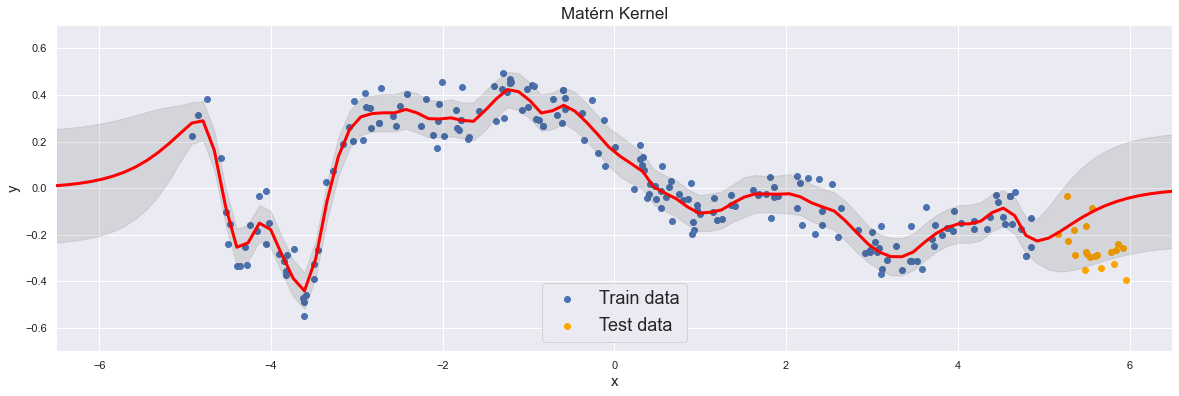

In [36]:
X_ = np.linspace(-6.5, 6.5, 100)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))

axs.scatter(X_train, y_train)
axs.scatter(X_test, y_test, color = 'orange')
y_mean, y_std = gpc_mat.predict(X_[:, np.newaxis], return_std = True)
y_mean = y_mean.reshape(-1,)
axs.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.1, color='k')
axs.plot(X_, y_mean, 'k', lw=3, zorder=9, color = 'red')
axs.set_xlabel("x", fontsize = 15)
axs.set_ylabel("y", fontsize = 15)
axs.set_title('', fontsize = 17)
axs.set_title('Matérn Kernel', fontsize = 17)
axs.set_xlim(-6.5, 6.5)
axs.set_ylim(-0.7, 0.7)
axs.legend([l1, l2],["Train data", "Test data"], loc = "lower center", prop={'size':18})

plt.savefig("GBF_MAT.pdf", bbox_inches='tight')